# Loan Approval

## Data Understanding

##### Company wants to automate the loan approval process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

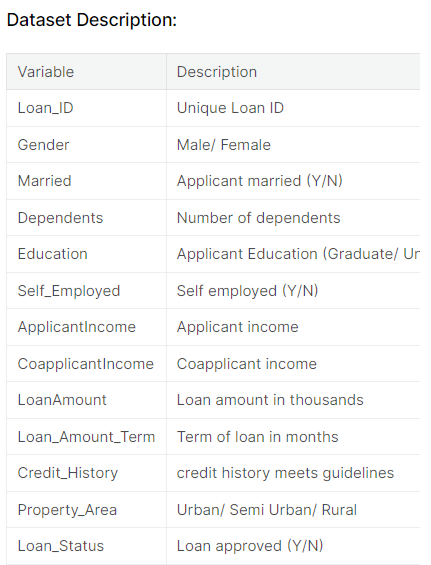

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r'E:/python\loanapproval.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Count number of Categorical and Numerical Columns ######################
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

In [7]:
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


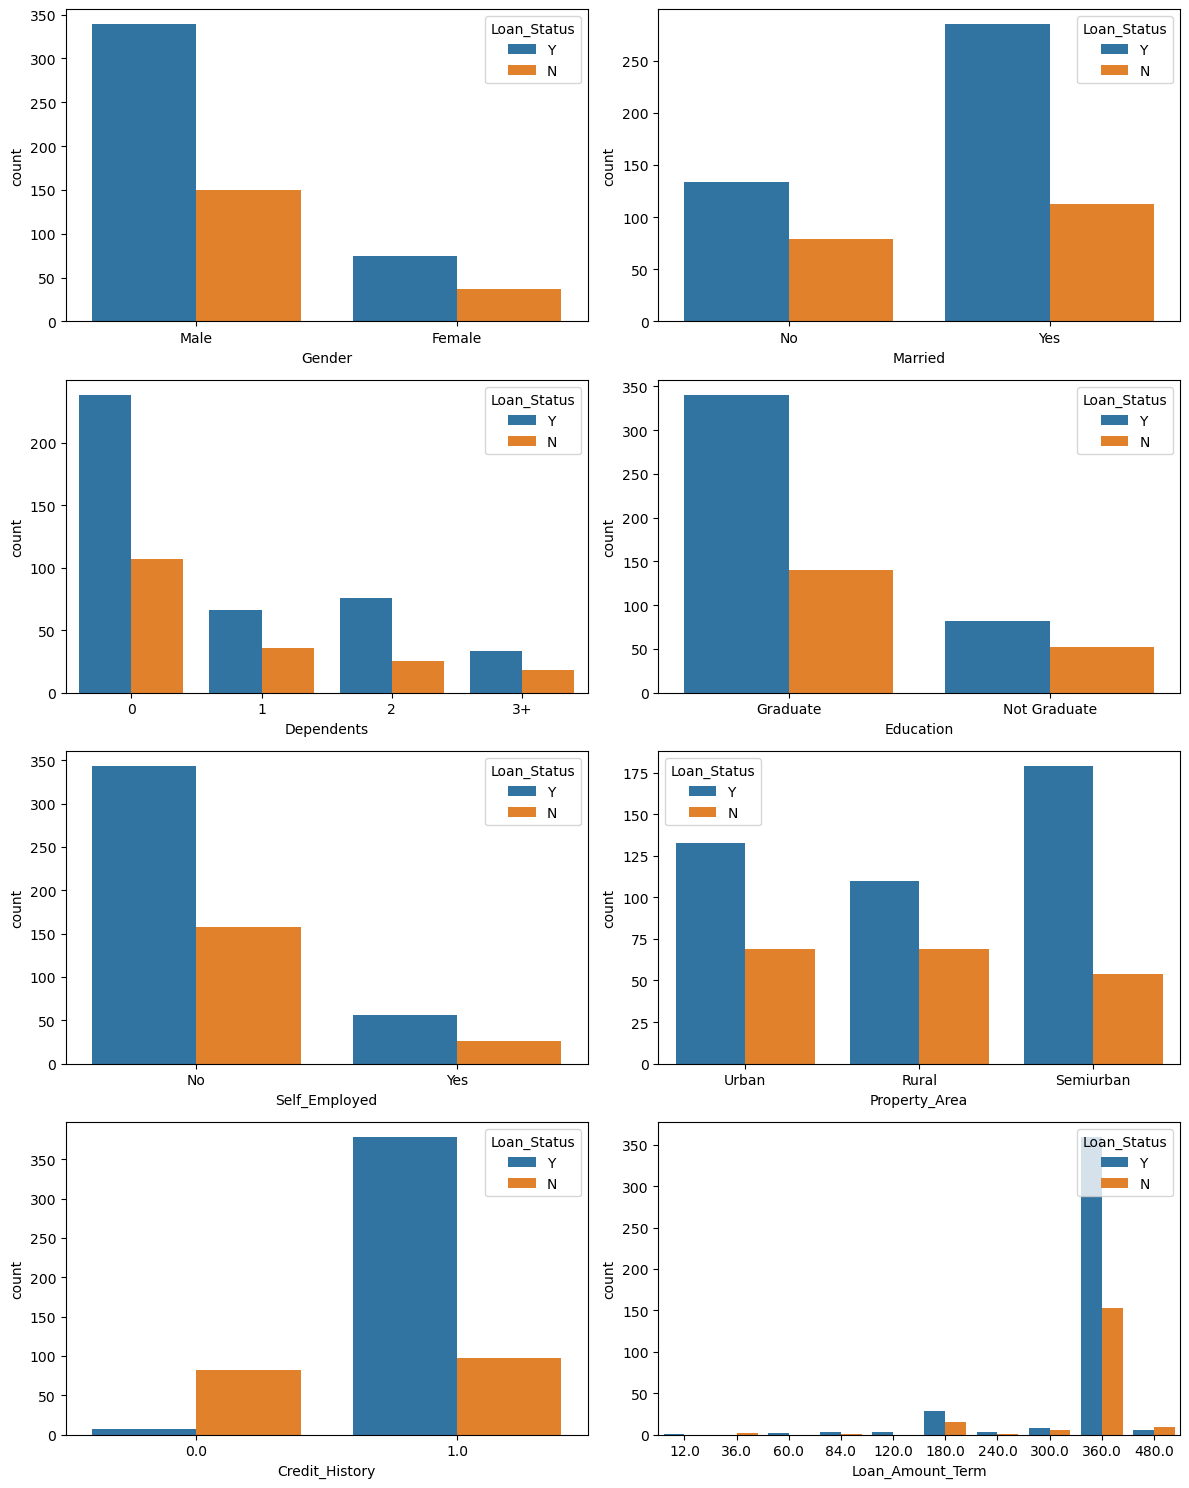

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

for cat_col, ax in zip(categorical_columns, axes.flatten()):
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax)

plt.tight_layout()

###### The above plots provide important insights about the dataset:

Loan Approval Status: Approximately two-thirds of the applicants have been approved for a loan.

Gender: The dataset is dominated by men, with roughly three times as many men as women.

Marital Status: The majority of the population in the dataset is married, and married applicants are more likely to be approved for loans.

Dependents: Most of the population has no dependents and is also more likely to be approved for a loan.

Education: Nearly five-sixths of the population are graduates, and graduates have a higher proportion of loan approvals.

Employment: About five-sixths of the population is not self-employed.

Property Area: There are more applicants from semi-urban areas, and they are also more likely to be approved for loans.

Credit History: Applicants with a credit history are much more likely to be approved.

Loan Amount Term: The majority of loans taken are for a term of 360 months (30 years).

In summary, the data suggests that being married, having no dependents, being a graduate, having a good credit history, and living in a semi-urban area are all factors that increase the likelihood of loan approval. Furthermore, the majority of loans are taken for a term of 30 years.

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


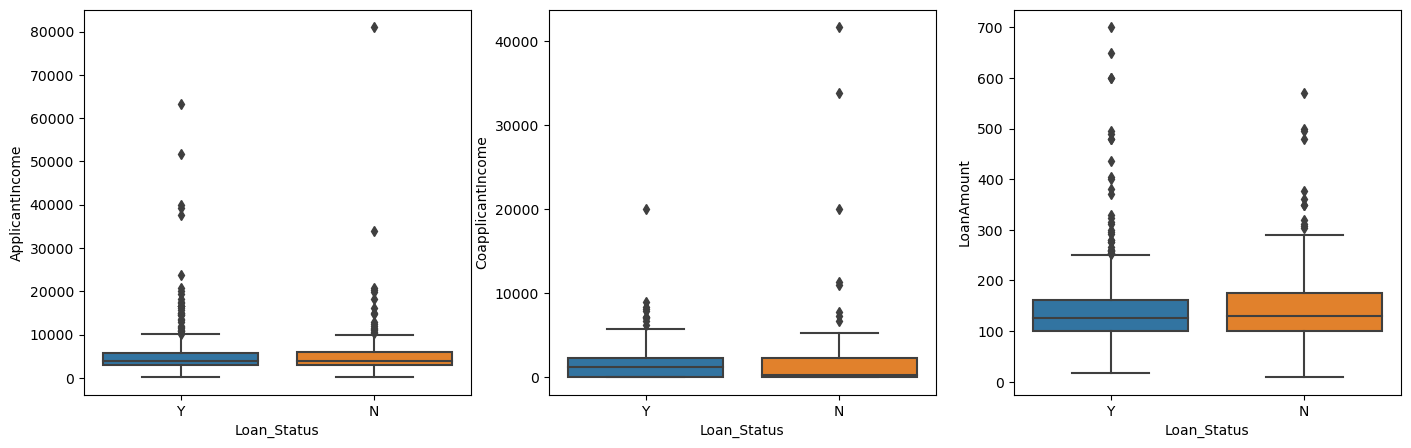

In [12]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

### Preprosseing data

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
#### Encoding categrical Features: ##########
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [19]:
# Split Features and Target Varible
X = df_encoded.drop(columns='Loan_Status_Y')
y = df_encoded['Loan_Status_Y']

In [20]:
#get_dummies function as converting categorical variables in the dataframe 'df1' into binary(0/1)
#drop first parameter is set to true means each categorical column and first uniquevalue will be dropped and not included in the encoded columns to prevent dummy variable trap.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify =y,random_state =42)

In [23]:
############### Handling/Imputing Missing values #############

In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

## Decision tree classifier 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Testing Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Testing Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Testing Mean F1 Score:  0.6371724087204722
Testing Mean Accuracy:  0.6921751025991791



From these results, we can conclude that the machine learning model is overfitting to the training data. The accuracy and F1 score on the training data are both 1.0, indicating that the model is able to perfectly fit the training data. However, the performance on the validation data is significantly worse, with a mean F1 score of 0.637 and a mean accuracy of 0.690. This suggests that the model is not able to generalize well to new, unseen data.

# What can be done to avoid overfitting
1.Pruning the tree
2.Tuning Hyperparameters
3.Feature Selection
4.Ensemble methods
5.Cross Validation


In [26]:
# Tuning Hyperparameters

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2']
}

# Create a decision tree classifier object
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best F1 ScoBest Hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}
Best F1 Score:  0.6493620862267532re: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}
Best F1 Score:  0.6493620862267532


In [32]:
# Create a new decision tree classifier with the best hyperparameters
tree_clf_tuned = DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=2, random_state=42)

# Fit the classifier on the training data
tree_clf_tuned.fit(X_train, y_train)

# Apply imputation to the testing data
X_test_imp = imp_train.transform(X_test)

# Make predictions on the testing data
y_pred = tree_clf_tuned.predict(X_test_imp)

# Evaluate the performance on the testing data
print("Test Data Set Accuracy: ", accuracy_score(y_test, y_pred))
print("Test Data Set F1 Score ", f1_score(y_test, y_pred))




Test Data Set Accuracy:  0.8
Test Data Set F1 Score  0.8582375478927202


 hyperparameter tuning has improved the performance of the decision tree classifier and reduced the overfitting problem. The F1 score on the test set has significantly improved, which means that the model is doing a better job of classifying the loan applications as approved or rejected.

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

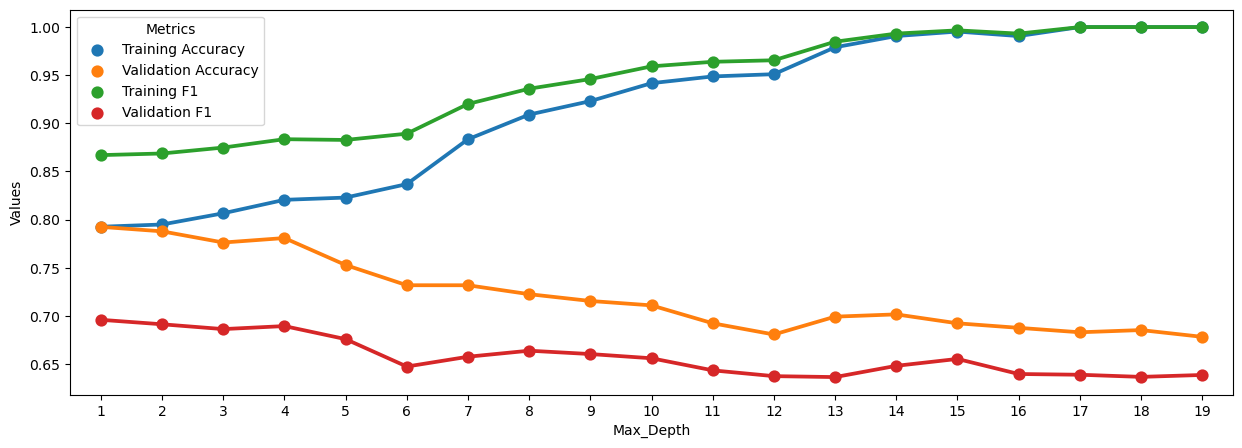

In [34]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

### Conclusion


From the results of the tuned decision tree classifier, we can see that the model is able to predict the loan status of applicants with an accuracy of 80% and an F1 score of 0.86 on the test data. This means that the model can correctly predict the loan status of applicants 80% of the time, and the F1 score indicates that the model has a good balance between precision and recall.

This model can be used to assess loan applicants by providing a quick and automated way to evaluate their eligibility for a loan. The model takes into account various factors such as credit history, income, loan amount, and other features to make its predictions. Using this model, a lender can make more informed and objective decisions about loan approvals, and reduce the risk of loan defaults. However, it's important to note that this model should not be used as the sole basis for making loan approval decisions, but rather as a tool to aid in the decision-making process. Human judgment and expertise should also be taken into account when evaluating loan applications.